In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
nba = "2020-stats.csv"

In [4]:
df_nba = pd.read_csv('2020-stats.csv')

In [5]:
nba = pd.read_csv('2020-stats.csv')
nba

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS,3PAr,...,TOVx,USGx,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Steven Adams,C,26,OKC,58,1564,20.8,0.605,0.007,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,2,Bam Adebayo,PF,22,MIA,65,2235,20.6,0.606,0.018,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,3,LaMarcus Aldridge,C,34,SAS,53,1754,19.8,0.571,0.198,...,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,4,Nickeil Alexander-Walker,SG,21,NOP,41,501,7.6,0.441,0.515,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,5,Grayson Allen,SG,24,MEM,30,498,11.4,0.577,0.517,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Thaddeus Young,PF,31,CHI,64,1591,13.3,0.521,0.369,...,13.9,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4
510,511,Trae Young,PG,21,ATL,60,2120,23.9,0.595,0.455,...,16.2,34.9,5.4,0.5,5.9,0.134,6.3,-2.3,4.0,3.2
511,512,Cody Zeller,C,27,CHO,58,1341,18.8,0.576,0.157,...,11.9,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5
512,513,Ante Žižić,C,23,CLE,22,221,16.4,0.597,0.000,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


In [14]:
clean1 = nba[nba['G']>20]

In [28]:
clean2 = clean1.drop(['Age', 'Tm'], axis=1)
clean2

,Rk,Player,Pos,G,MP,PER,TS,3PAr,FTr,ORBx,...,TOVx,USGx,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Steven Adams,C,58,1564,20.8,0.605,0.007,0.413,14.4,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,2,Bam Adebayo,PF,65,2235,20.6,0.606,0.018,0.476,8.7,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,3,LaMarcus Aldridge,C,53,1754,19.8,0.571,0.198,0.241,6.3,...,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,4,Nickeil Alexander-Walker,SG,41,501,7.6,0.441,0.515,0.123,1.7,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,5,Grayson Allen,SG,30,498,11.4,0.577,0.517,0.199,1.1,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Thaddeus Young,PF,64,1591,13.3,0.521,0.369,0.120,6.2,...,13.9,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4
510,511,Trae Young,PG,60,2120,23.9,0.595,0.455,0.448,1.6,...,16.2,34.9,5.4,0.5,5.9,0.134,6.3,-2.3,4.0,3.2
511,512,Cody Zeller,C,58,1341,18.8,0.576,0.157,0.374,12.6,...,11.9,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5
512,513,Ante Žižić,C,22,221,16.4,0.597,0.000,0.264,9.0,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


,Rk,Player,Pos,Age,Tm,G,MP,PER,TS,3PAr,...,TOVx,USGx,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Steven Adams,C,26,OKC,58,1564,20.8,0.605,0.007,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,2,Bam Adebayo,PF,22,MIA,65,2235,20.6,0.606,0.018,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,3,LaMarcus Aldridge,C,34,SAS,53,1754,19.8,0.571,0.198,...,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,4,Nickeil Alexander-Walker,SG,21,NOP,41,501,7.6,0.441,0.515,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,5,Grayson Allen,SG,24,MEM,30,498,11.4,0.577,0.517,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Thaddeus Young,PF,31,CHI,64,1591,13.3,0.521,0.369,...,13.9,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4
510,511,Trae Young,PG,21,ATL,60,2120,23.9,0.595,0.455,...,16.2,34.9,5.4,0.5,5.9,0.134,6.3,-2.3,4.0,3.2
511,512,Cody Zeller,C,27,CHO,58,1341,18.8,0.576,0.157,...,11.9,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5
512,513,Ante Žižić,C,23,CLE,22,221,16.4,0.597,0.000,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


In [33]:
X = clean2.drop(['Player', 'Pos', 'G'], axis=1)
y = clean2['Pos']

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.decomposition import PCA

In [37]:

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.586505886875537


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
LDA = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')

In [54]:
LDA_df = LDA.fit(X_scaled,y).transform(X_scaled)

C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:205: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:205: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


In [55]:
LDA.score(X_scaled,y)

0.6513994910941476

In [60]:
kmeans_model = KMeans(n_clusters=9, random_state=1)
kmeans_model.fit(LDA_df)
new_model = kmeans_model.labels_
new_model

array([5, 5, 2, 8, 0, 1, 6, 5, 4, 4, 8, 4, 3, 1, 0, 3, 1, 7, 4, 0, 6, 4,
       8, 2, 4, 2, 3, 0, 0, 5, 8, 4, 8, 2, 5, 5, 6, 3, 0, 0, 6, 3, 1, 3,
       0, 1, 4, 4, 3, 0, 8, 4, 4, 4, 3, 5, 0, 3, 0, 4, 8, 6, 0, 1, 6, 0,
       4, 5, 8, 0, 5, 5, 4, 3, 5, 2, 5, 0, 8, 5, 8, 6, 8, 4, 0, 2, 4, 0,
       0, 0, 2, 5, 6, 2, 7, 8, 5, 4, 5, 3, 0, 3, 0, 0, 4, 8, 3, 1, 0, 8,
       0, 0, 5, 4, 0, 6, 1, 5, 0, 5, 8, 4, 0, 0, 7, 7, 3, 6, 5, 4, 0, 3,
       6, 2, 8, 5, 5, 4, 1, 8, 6, 0, 3, 4, 4, 0, 3, 2, 6, 4, 8, 6, 0, 8,
       4, 2, 0, 4, 4, 8, 4, 5, 5, 6, 5, 2, 5, 0, 4, 0, 8, 0, 8, 3, 4, 6,
       5, 0, 6, 4, 1, 8, 4, 4, 2, 2, 8, 6, 2, 4, 0, 2, 4, 3, 6, 7, 8, 4,
       6, 8, 5, 5, 4, 7, 1, 8, 6, 1, 8, 2, 2, 3, 4, 0, 6, 0, 6, 4, 5, 0,
       0, 8, 0, 2, 0, 0, 5, 8, 2, 3, 3, 4, 2, 6, 2, 3, 4, 2, 5, 2, 8, 1,
       4, 8, 4, 0, 8, 8, 7, 4, 1, 4, 4, 7, 4, 6, 6, 8, 8, 0, 0, 2, 8, 8,
       8, 0, 7, 4, 6, 3, 8, 8, 8, 0, 2, 0, 4, 2, 3, 3, 4, 5, 3, 8, 4, 1,
       4, 5, 8, 4, 2, 0, 4, 6, 6, 5, 2, 3, 7, 8, 3,

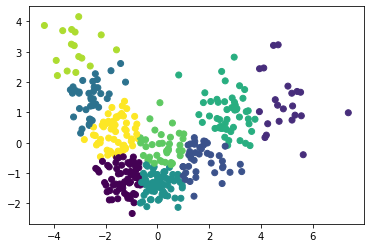

In [63]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(LDA_df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=new_model)
plt.show()

In [73]:
plot_columns

array([[ 3.07070811e+00,  1.12852093e+00],
       [ 1.77698609e+00,  1.32473116e+00],
       [ 1.61435324e+00, -3.72839317e-01],
       [-1.67959274e+00,  1.12868624e-01],
       [-9.26111039e-01, -6.08528859e-01],
       [ 4.20997001e+00,  2.53164691e-01],
       [ 1.47962411e-01,  2.69237813e-01],
       [ 2.05988210e+00,  1.36163345e+00],
       [ 5.44202309e-02, -1.45169951e+00],
       [-2.22041541e-01, -1.49427706e+00],
       [-1.64771953e+00, -4.00638523e-01],
       [-5.16529311e-01, -1.73019212e+00],
       [-3.01017976e+00,  1.12836216e+00],
       [ 3.94077813e+00,  1.02708184e+00],
       [-1.76888720e+00, -1.20733995e+00],
       [-1.93795159e+00,  1.45837098e+00],
       [ 4.70274751e+00,  7.08719292e-01],
       [-3.31162820e+00,  3.73548435e+00],
       [-2.13543098e-01, -1.59126386e+00],
       [-1.14559906e+00, -1.19486605e+00],
       [-3.66506967e-01, -5.70002824e-01],
       [ 5.24335726e-01, -1.52403261e+00],
       [-8.78656317e-01,  8.71035593e-01],
       [ 1.

In [65]:
new_model2 = pd.DataFrame(new_model)
new_model2 = new_model2.rename(columns={0: "clusters"})
new_model3 = new_model2['clusters']
new_model3

0      5
1      5
2      2
3      8
4      0
      ..
388    6
389    7
390    5
391    5
392    1
Name: clusters, Length: 393, dtype: int32

In [70]:
kmeans_model['clusters'] = new_model3
kmeans_model

TypeError: 'KMeans' object does not support item assignment